<a href="https://colab.research.google.com/github/abderrahimhamadi/Ensemble-Learning-Applied-to-Medical-Data/blob/main/Ensemble_Learning_PFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Classification Using Ensemble Learning Methods

This notebook aims to classify heart failure patients using various ensemble learning methods. We will compare the performance of different models and discuss the results.

## 1. Introduction
This section introduces the problem of heart failure classification and the importance of accurate predictions in medical diagnoses.

## 2. Data Loading and Exploration

### 2.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
import optuna
from optuna import Trial, samplers, create_study
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


Here we import the necessary libraries for data manipulation, visualization, and model building.

### 2.2 Load Dataset

In [ ]:
# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')


# Get an overview of the dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We load the heart failure dataset and display the first few rows to understand its structure.

### 2.3 Data Exploration

In [ ]:
data.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.corrwith(data['DEATH_EVENT']).abs().sort_values(ascending=False)


DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
dtype: float64

In this part, we perform exploratory data analysis (EDA) to understand the dataset better. This includes checking for null values, summarizing the data, and examining correlations with the target variable.

## 3. Data Visualization
### 3.1 Histograms and Correlation Matrix

In [ ]:

corr_matrix = data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,0.081584,0.101012,0.060098,0.093289,0.052354,0.159187,0.045966,0.065430,0.018668,0.224068,0.253729
anaemia,0.088006,1.000000,0.190741,0.012729,0.031557,0.038182,0.043786,0.052174,0.041882,0.094769,0.107290,0.141414,0.066270
creatinine_phosphokinase,0.081584,0.190741,1.000000,0.009639,0.044080,0.070590,0.024463,0.016408,0.059550,0.079791,0.002421,0.009346,0.062728
diabetes,0.101012,0.012729,0.009639,1.000000,0.004850,0.012732,0.092193,0.046975,0.089551,0.157730,0.147173,0.033726,0.001943
ejection_fraction,0.060098,0.031557,0.044080,0.004850,1.000000,0.024445,0.072177,0.011302,0.175902,0.148386,0.067315,0.041729,0.268603
high_blood_pressure,0.093289,0.038182,0.070590,0.012732,0.024445,1.000000,0.049963,0.004935,0.037109,0.104615,0.055711,0.196439,0.079351
platelets,0.052354,0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,0.041198,0.062125,0.125120,0.028234,0.010514,0.049139
serum_creatinine,0.159187,0.052174,0.016408,0.046975,0.011302,0.004935,0.041198,1.000000,0.189095,0.006970,0.027414,0.149315,0.294278
serum_sodium,0.045966,0.041882,0.059550,0.089551,0.175902,0.037109,0.062125,0.189095,1.000000,0.027566,0.004813,0.087640,0.195204
sex,0.065430,0.094769,0.079791,0.157730,0.148386,0.104615,0.125120,0.006970,0.027566,1.000000,0.445892,0.015608,0.004316


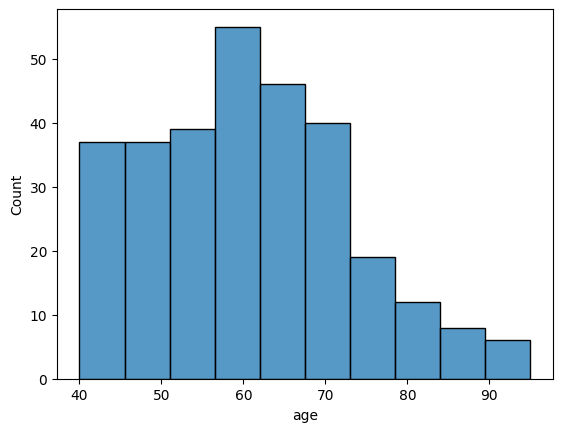

In [ ]:
sns.histplot(data['age'])
plt.show()

From this information above, it is obvious that dataset mainly has information about people aged between 55 and 65.


Here, we visualize the distribution of ages in the dataset and create a correlation matrix to understand relationships between variables.

### 3.2 Survival Analysis
Diabetes and Survival

In [ ]:
# DIABETES and SURVIVAL

diabetes_yes = data[data['diabetes']==1]
diabetes_no = data[data['diabetes']==0]

diabetes_yes_survive = diabetes_yes[data["DEATH_EVENT"]==0]
diabetes_yes_not_survive = diabetes_yes[data["DEATH_EVENT"]==1]
diabetes_no_survive = diabetes_no[data["DEATH_EVENT"]==0]
diabetes__no_not_survive = diabetes_no[data["DEATH_EVENT"]==1]

labels = ['Patient with diabetes - Survived','Patient with diabetes - Not Survived', 'Patient without diabetes - Survived', 'Patient without diabetes - Not Survived']

values = [len(diabetes_yes[data["DEATH_EVENT"]==0]),len(data[data["DEATH_EVENT"]==1]),
         len(diabetes_no[data["DEATH_EVENT"]==0]),len(diabetes_no[data["DEATH_EVENT"]==1])]

colors = ['#660000', # Red (with diabetes - survived)
          '#292323', # Black (with diabetes - not survived)
          '#9eb8d0', # Light Blue (without diabetes - survived)
          '#0a0a4e'] # Dark Blue (without diabetes - not survived)

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, marker=dict(colors=colors))])

# Update layout with title
fig.update_layout(title_text="Analysis on Survival - Diabetes")

# Show the plot
fig.show()


<ipython-input-159-2eb09b1a3cec>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-159-2eb09b1a3cec>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-159-2eb09b1a3cec>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-159-2eb09b1a3cec>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-159-2eb09b1a3cec>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-159-2eb09b1a3cec>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-159-2eb09b1a3cec>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



We analyze survival rates based on the presence of diabetes and visualize the results using a pie chart.

Anaemia and Survival

In [ ]:
# ANAEMIA and SURVIVAL

anaemia_yes = data[data['anaemia']==1]
anaemia_no = data[data['anaemia']==0]

anaemia_yes_survival = anaemia_yes[data["DEATH_EVENT"]==0]
anaemia_yes_not_survival = anaemia_yes[data["DEATH_EVENT"]==1]
anaemia_no_survival = anaemia_no[data["DEATH_EVENT"]==0]
anaemia_no_not_survival = anaemia_no[data["DEATH_EVENT"]==1]

labels = ['Patient with anaemia - Survived','Patient with anaemia - Not Survived', 'Patient without anaemia - Survived', 'Patient without anaemia - Not Survived']

values = [len(anaemia_yes[data["DEATH_EVENT"]==0]),len(anaemia_yes[data["DEATH_EVENT"]==1]),
         len(anaemia_no[data["DEATH_EVENT"]==0]),len(anaemia_no[data["DEATH_EVENT"]==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,marker=dict(colors=colors))])

fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

<ipython-input-160-3826cc723c95>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-160-3826cc723c95>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-160-3826cc723c95>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-160-3826cc723c95>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-160-3826cc723c95>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-160-3826cc723c95>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-160-3826cc723c95>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-160-3826cc723c95>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



We analyze survival rates based on the presence of anaemia and visualize the results using a pie chart.

High Blood Pressure and Survival

In [ ]:
# HIGH BLOOD PRESSURE and SURVIVAL

hbp_yes = data[data['high_blood_pressure']==1]
hbp_no = data[data['high_blood_pressure']==0]

bp_yes_survive = hbp_yes[data["DEATH_EVENT"]==0]
hbp_yes_not_survive = hbp_yes[data["DEATH_EVENT"]==1]
hbp_no_survive = hbp_no[data["DEATH_EVENT"]==0]
hbp_no_not_survive = hbp_no[data["DEATH_EVENT"]==1]

labels = ['Patient with HBP - Survived','Patient with HBP - Not Survived', 'Patient without HBP - Survived', 'Patient without HBP - Not Survived']

values = [len(hbp_yes[data["DEATH_EVENT"]==0]),len(hbp_yes[data["DEATH_EVENT"]==1]),
         len(hbp_no[data["DEATH_EVENT"]==0]),len(hbp_no[data["DEATH_EVENT"]==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,marker=dict(colors=colors))])

fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

<ipython-input-161-72f2315ca977>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-161-72f2315ca977>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-161-72f2315ca977>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-161-72f2315ca977>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-161-72f2315ca977>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-161-72f2315ca977>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-161-72f2315ca977>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-161-72f2315ca977>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



We analyze survival rates based on the presence of high blood pressure and visualize the results using a pie chart.

Smoking and Survival

In [ ]:
# SMOKING and SURVIVAL

smoking_yes = data[data['smoking']==1]
smoking_no = data[data['smoking']==0]

smoking_yes_survival = smoking_yes[data["DEATH_EVENT"]==0]
smoking_yes_not_survival = smoking_yes[data["DEATH_EVENT"]==1]
smoking_no_survival = smoking_no[data["DEATH_EVENT"]==0]
smoking_no_not_survival = smoking_no[data["DEATH_EVENT"]==1]

labels = ['Patient who smokes - Survived','Patient who smokes - Not Survived', 'Patient who does not smoke - Survived', 'Patient who does not smoke- Not Survived']

values = [len(smoking_yes[data["DEATH_EVENT"]==0]),len(smoking_yes[data["DEATH_EVENT"]==1]),
         len(smoking_no[data["DEATH_EVENT"]==0]),len(smoking_no[data["DEATH_EVENT"]==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,marker=dict(colors=colors))])

fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

<ipython-input-162-5ede3bd468c1>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-5ede3bd468c1>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-5ede3bd468c1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-5ede3bd468c1>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-5ede3bd468c1>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-5ede3bd468c1>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-5ede3bd468c1>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-5ede3bd468c1>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



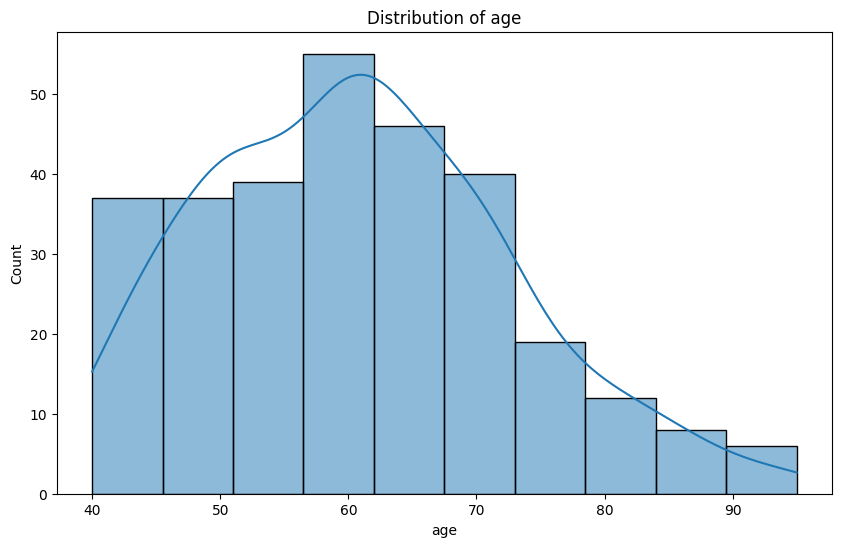

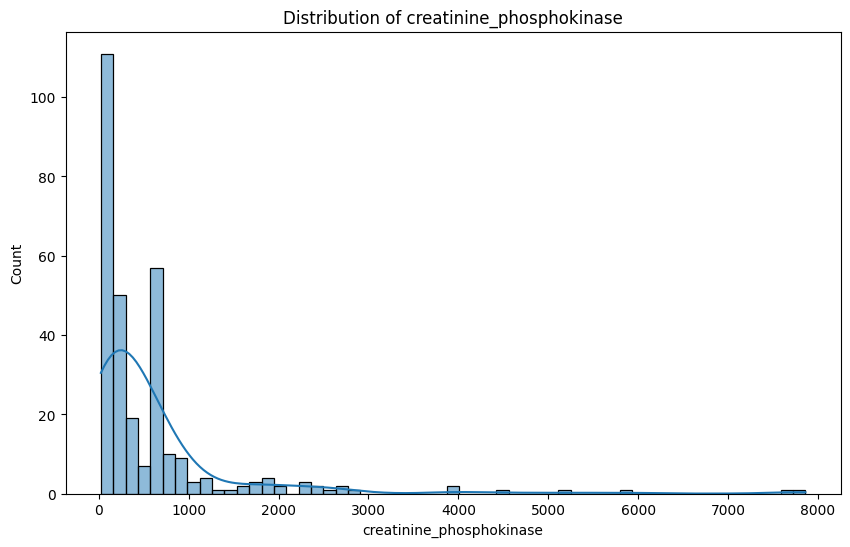

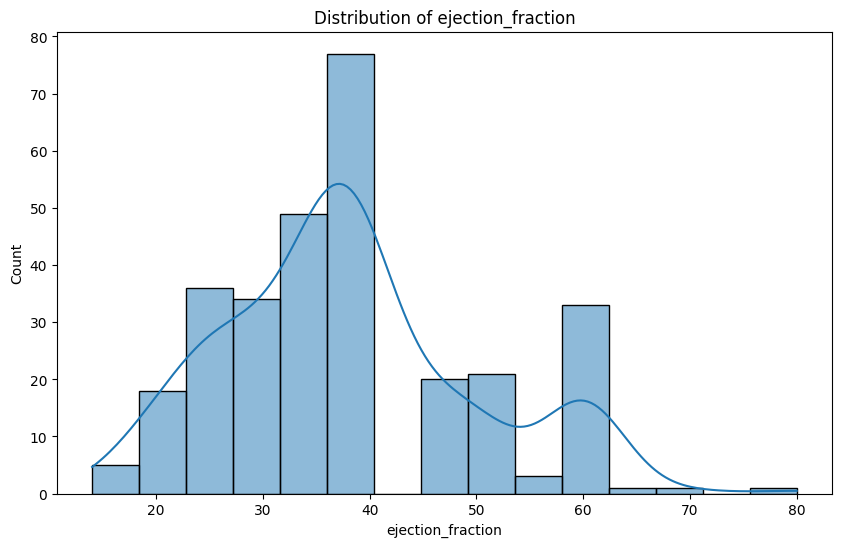

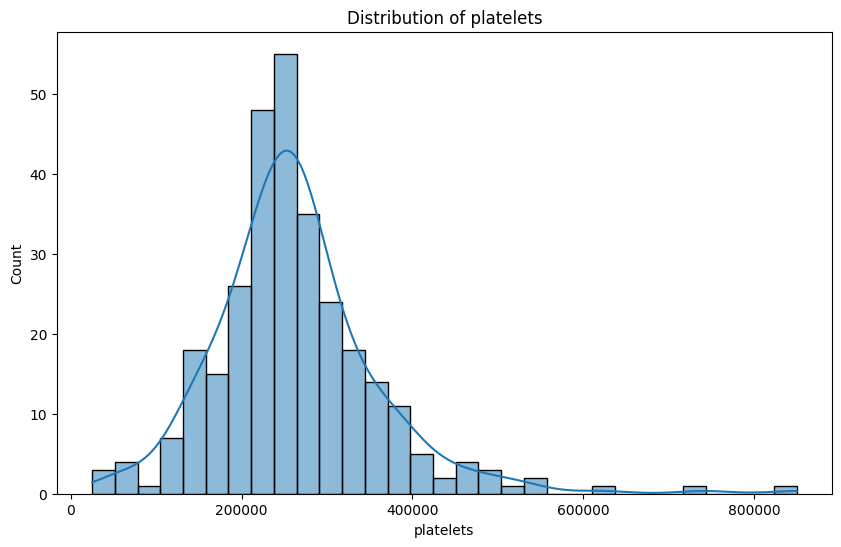

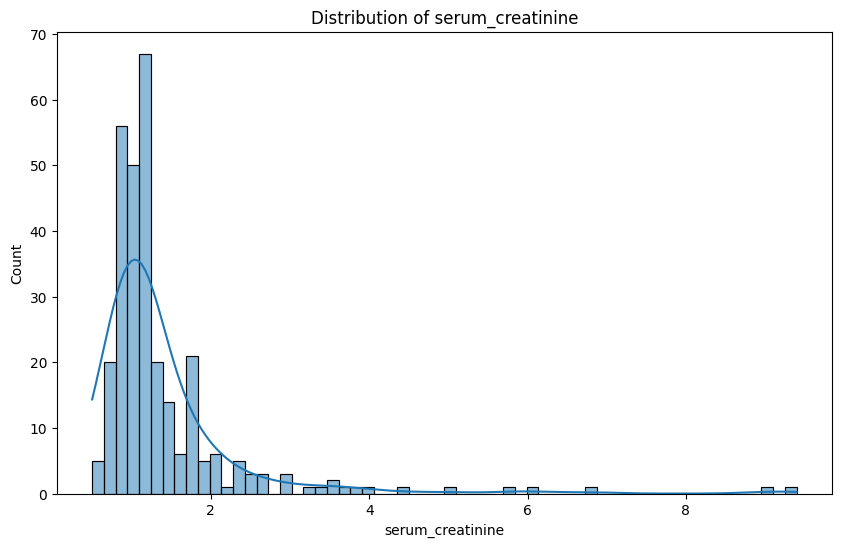

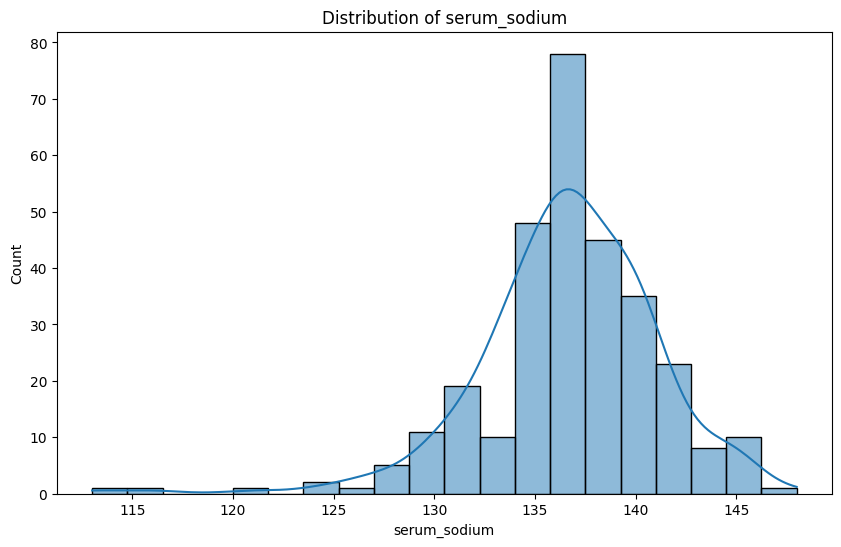

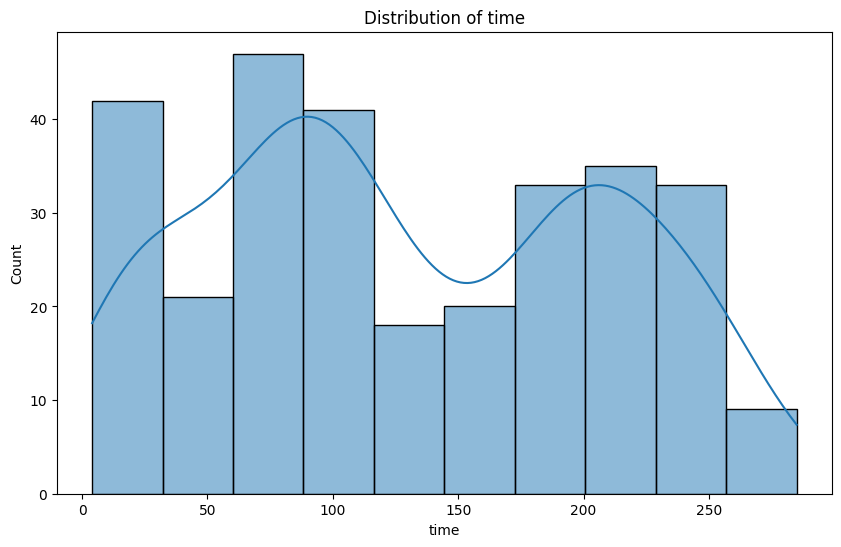

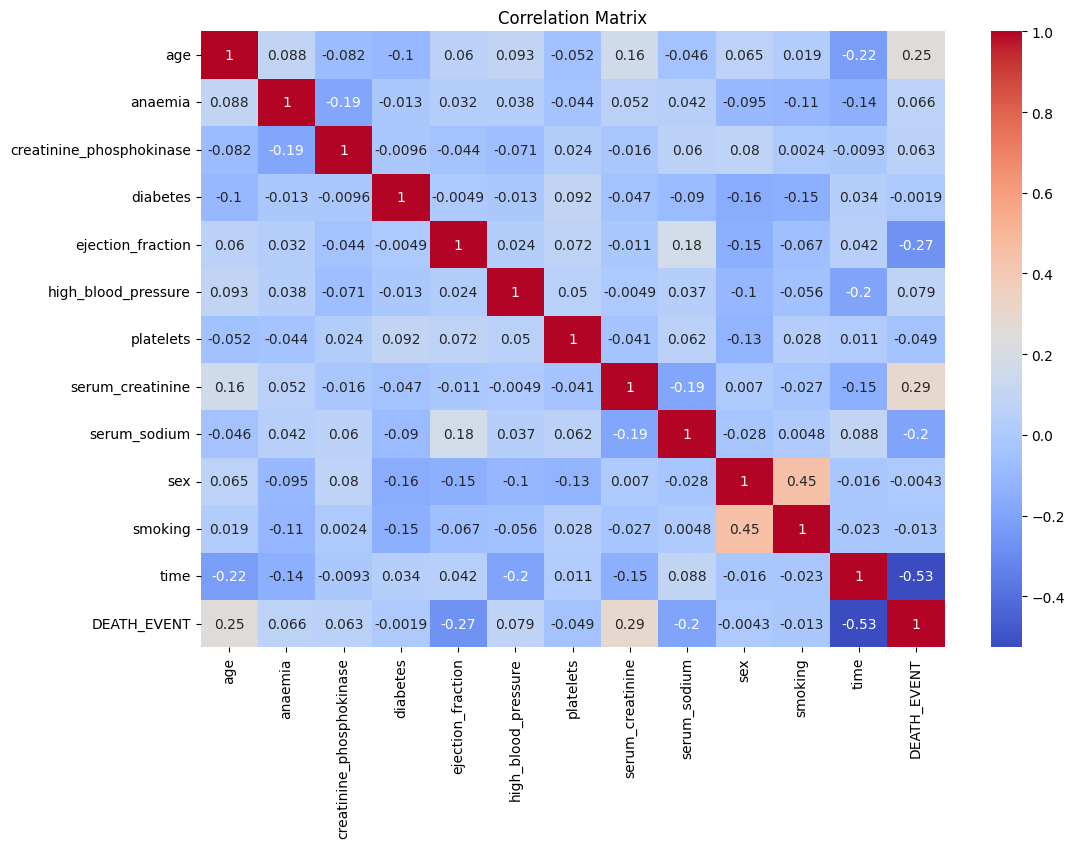

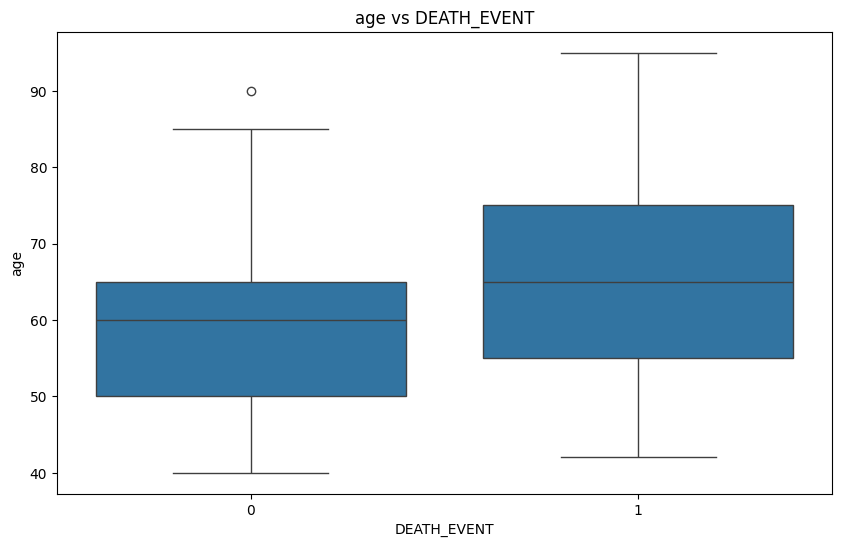

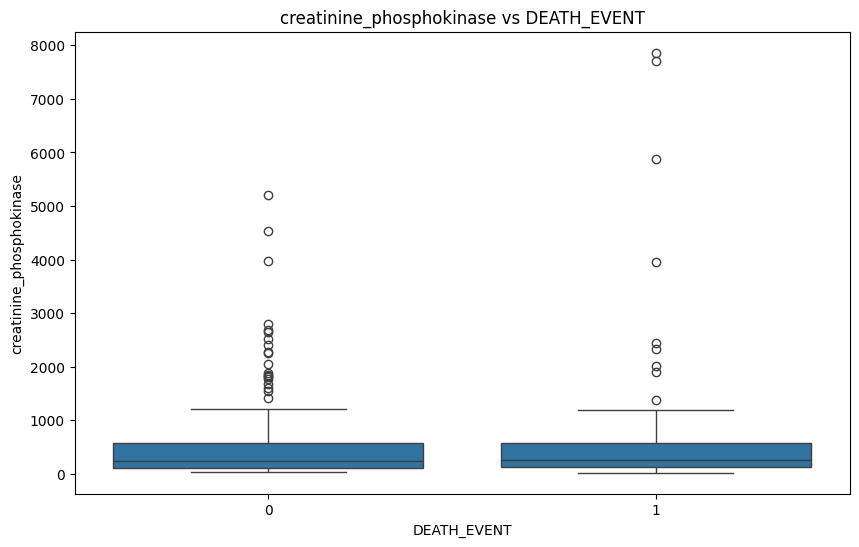

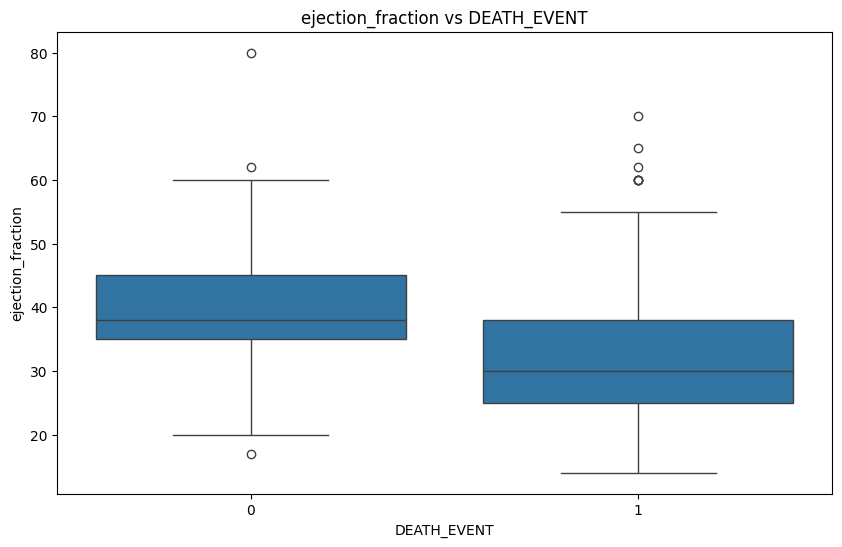

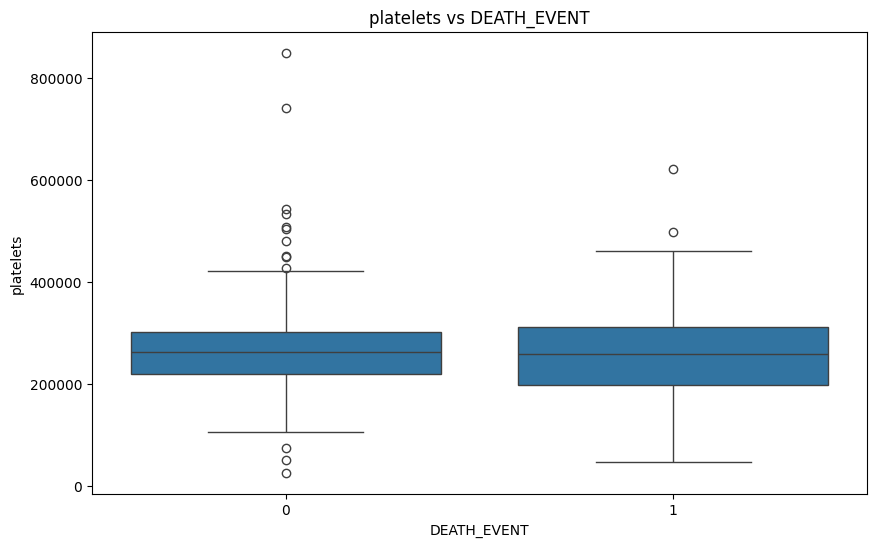

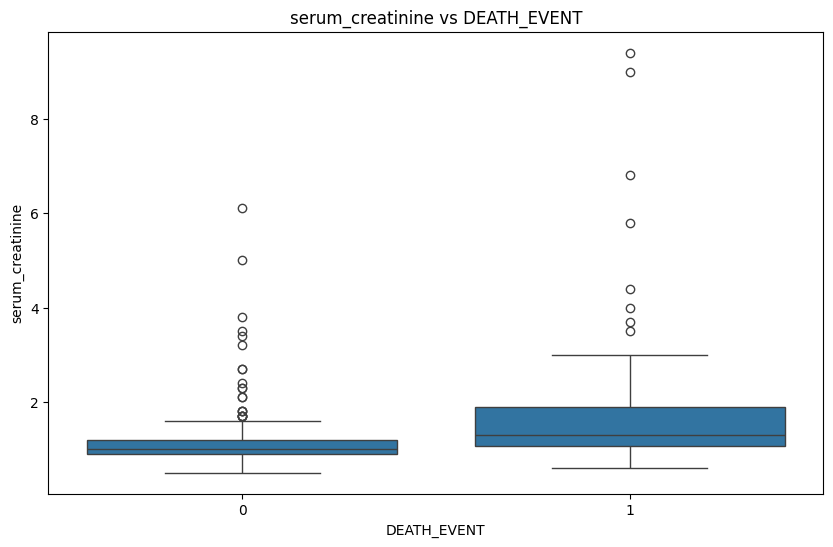

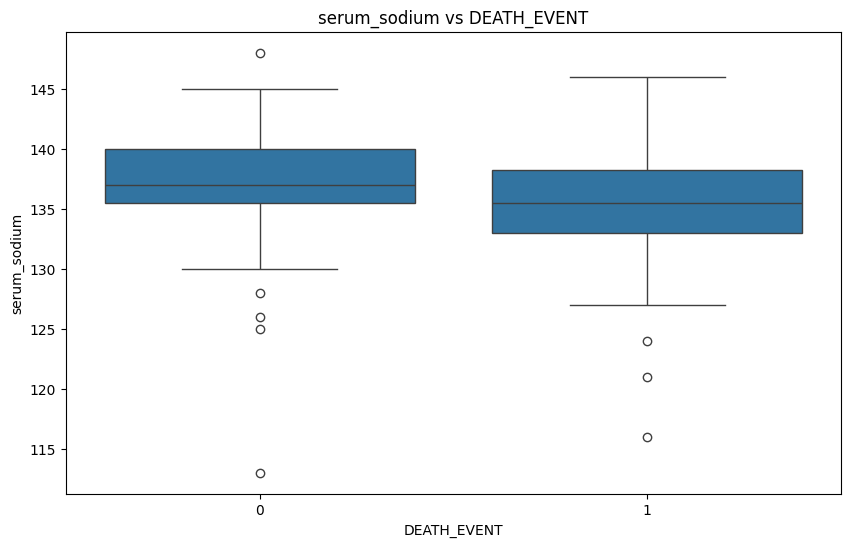

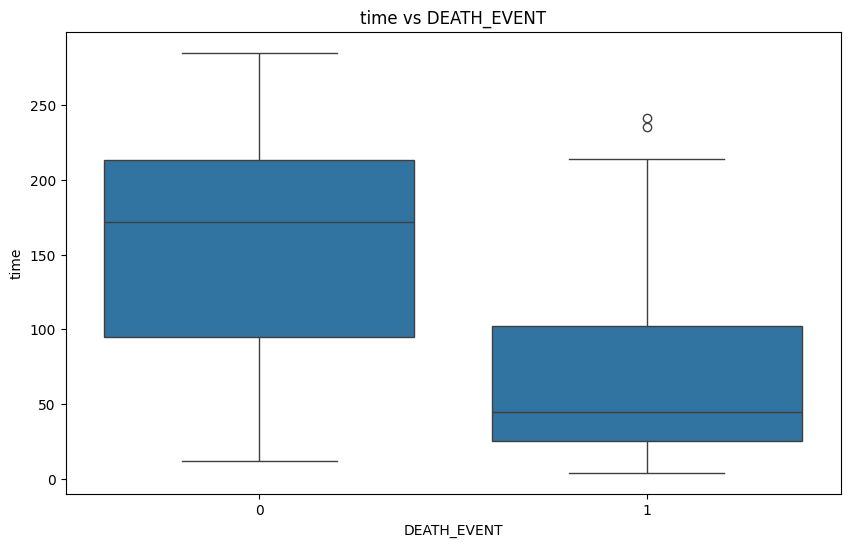

In [ ]:
# Visualize the distribution of numerical features
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize the correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between features and the target
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DEATH_EVENT', y=feature, data=data)
    plt.title(f'{feature} vs DEATH_EVENT')
    plt.show()



## 4. Data Preprocessing
### 4.1 Convert Binary Columns
We convert binary columns to integer type to ensure proper processing in the machine learning models.

### 4.2 Feature Selection and Standardization
This section handles feature selection based on correlation results, splitting the dataset into training and testing sets, and standardizing the selected features for better model performance.


### 4.3 Train-Test Split and Standardization

In [ ]:
# Convert binary columns to integer type
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
data[binary_columns] = data[binary_columns].astype(int)

# Split data into features and target
#X = data.drop('DEATH_EVENT', axis=1)
#y = data['DEATH_EVENT']

features = ['time','ejection_fraction','serum_creatinine']

X = data[features]
y = data['DEATH_EVENT']
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train=X_train_scaled
X_test=X_test_scaled

## 5. Model Building and Training
### 5.1 Random Forest Classifier

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9
[[41  2]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



We train a Random Forest classifier and make predictions on the test set.

### 5.2 Gradient Boosting Classifier

In [ ]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
gb_preds = gb.predict(X_test_scaled)

# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print(confusion_matrix(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


Gradient Boosting Accuracy: 0.95
[[42  1]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.94      0.88      0.91        17

    accuracy                           0.95        60
   macro avg       0.95      0.93      0.94        60
weighted avg       0.95      0.95      0.95        60



We train a Gradient Boosting classifier and make predictions on the test set.

### 5.3 AdaBoost Classifier

In [ ]:
# AdaBoost Classifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_scaled, y_train)
ab_preds = ab.predict(X_test_scaled)

# Evaluate AdaBoost
print("AdaBoost Accuracy:", accuracy_score(y_test, ab_preds))
print(confusion_matrix(y_test, ab_preds))
print(classification_report(y_test, ab_preds))


AdaBoost Accuracy: 0.9
[[40  3]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.82      0.82        17

    accuracy                           0.90        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60



We train an AdaBoost classifier and make predictions on the test set.

### 5.4 XGBoost Classifier

In [ ]:
# XGBoost Classifier

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_scaled, y_train)
xgb_preds = xgb_clf.predict(X_test_scaled)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.8833333333333333
[[41  2]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.86      0.71      0.77        17

    accuracy                           0.88        60
   macro avg       0.87      0.83      0.85        60
weighted avg       0.88      0.88      0.88        60



We train an XGBoost classifier and make predictions on the test set.

### 5.5 LightGBM Classifier

In [ ]:
# LightGBM Classifier

lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train_scaled, y_train)
lgb_preds = lgb_clf.predict(X_test_scaled)

# Evaluate LightGBM
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_preds))
print(confusion_matrix(y_test, lgb_preds))
print(classification_report(y_test, lgb_preds))


[LightGBM] [Info] Number of positive: 79, number of negative: 160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330544 -> initscore=-0.705726
[LightGBM] [Info] Start training from score -0.705726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

We train a LightGBM classifier and make predictions on the test set.

### 5.6 CatBoost Classifier

In [ ]:
# CatBoost Classifier
cat_clf = cat.CatBoostClassifier(random_state=42)
cat_clf.fit(X_train_scaled, y_train)
cat_preds = cat_clf.predict(X_test_scaled)

# Evaluate CatBoost
print("CatBoost Accuracy:", accuracy_score(y_test, cat_preds))
print(confusion_matrix(y_test, cat_preds))
print(classification_report(y_test, cat_preds))


Learning rate set to 0.005591
0:	learn: 0.6888474	total: 6.71ms	remaining: 6.7s
1:	learn: 0.6842180	total: 8.25ms	remaining: 4.12s
2:	learn: 0.6787563	total: 10.5ms	remaining: 3.5s
3:	learn: 0.6741682	total: 12.7ms	remaining: 3.15s
4:	learn: 0.6693097	total: 15ms	remaining: 2.98s
5:	learn: 0.6658372	total: 16.7ms	remaining: 2.76s
6:	learn: 0.6621221	total: 18.8ms	remaining: 2.66s
7:	learn: 0.6577253	total: 20.7ms	remaining: 2.57s
8:	learn: 0.6534453	total: 23ms	remaining: 2.53s
9:	learn: 0.6490773	total: 25.3ms	remaining: 2.5s
10:	learn: 0.6448159	total: 27.4ms	remaining: 2.46s
11:	learn: 0.6409765	total: 30.8ms	remaining: 2.53s
12:	learn: 0.6373356	total: 33.2ms	remaining: 2.52s
13:	learn: 0.6335030	total: 36.2ms	remaining: 2.55s
14:	learn: 0.6303093	total: 38.3ms	remaining: 2.51s
15:	learn: 0.6264350	total: 40.2ms	remaining: 2.47s
16:	learn: 0.6228720	total: 43.5ms	remaining: 2.51s
17:	learn: 0.6193329	total: 45.9ms	remaining: 2.5s
18:	learn: 0.6163589	total: 48.9ms	remaining: 2.52s


## 6. Model Evaluation
### 6.1 Accuracy and Classification Report

We evaluate each model's performance using classification reports, which include precision, recall, F1-score, and accuracy.
### 6.2 ROC and AUC


<Figure size 1000x800 with 0 Axes>

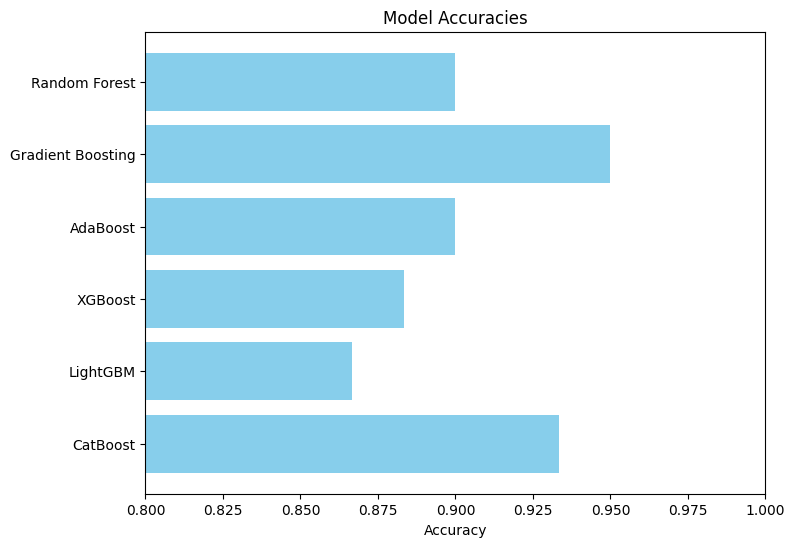

In [ ]:
# Compare ROC curves
plt.figure(figsize=(10, 8))
accuracies=[]
models = [
    ('Random Forest', rf, X_test_scaled),
    ('Gradient Boosting', gb, X_test_scaled),
    ('AdaBoost', ab, X_test_scaled),
    ('XGBoost', xgb_clf, X_test_scaled),
    ('LightGBM', lgb_clf, X_test_scaled),
    ('CatBoost', cat_clf, X_test_scaled)
]

for name, model, X_test_data in models:
    y_pred = model.predict(X_test_data)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))

# Plotting accuracies
plt.figure(figsize=(8, 6))
names, accs = zip(*accuracies)
plt.barh(names, accs, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0.8, 1.0)
plt.gca().invert_yaxis()
plt.show()


We calculate the ROC AUC for each model and plot the ROC curves to visually compare their performance.

## 7. Hyperparameter Tuning with Optuna
### 7.1 Define Objective Function
This section defines the objective function for Optuna to optimize. It includes hyperparameters for tuning and returns the model's accuracy.

### 7.2 Run Optuna Study

In [ ]:
def xgb_objective(trial):
    # Set XGBoost parameters
    params = {
        'booster': 'gbtree',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 0, 10),
        'max_leaves': trial.suggest_int('max_leaves', 0, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.6, 1),
        'random_state' : trial.suggest_int('random_state', 21, 21),
        'validate_parameters': True
    }

    # Train the XGBoost classifier
    xgb_model = xgb.XGBClassifier(tree_method='auto', device='cpu', objective='binary:logistic',
                              eval_metric='auc', enable_categorical=True, **params)
    xgb_model.fit(X_train, y_train)

    # Make predictions
    preds = xgb_model.predict(X_test)

    # Calculate the metrics
    #accuracy = accuracy_score(y_test, preds)  # Accuracy measures the overall correctness of the model's predictions.
    #precision = precision_score(y_test, preds)  # Precision measures the accuracy of positive predictions, avoiding false positives.
    #recall = recall_score(y_test, preds)  # Recall (Sensitivity) measures the ability of the model to identify all relevant instances.
    pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # For AUC-ROC classification calculation (optional)
    auc_roc = roc_auc_score(y_test, pred_prob)  # AUC-ROC measures the area under the receiver operating characteristic curve, evaluating the model's ability to discriminate between positive and negative instances.



    #return accuracy
    #return precision
    #return recall
    return auc_roc
# Define objective function for AdaBoost
def ada_objective(trial):
    # Set AdaBoost parameters
    base_estimator_params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    }

    # Create the base estimator with the above parameters
    base_estimator = DecisionTreeClassifier(**base_estimator_params, random_state=42)

    # Set AdaBoost parameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])
    }

    # Train the AdaBoost classifier with the base estimator
    ada_model = AdaBoostClassifier(base_estimator=base_estimator, **params, random_state=42)
    ada_model.fit(X_train, y_train)

    # Make predictions
    preds = ada_model.predict(X_test)

    # Calculate the AUC-ROC
    pred_prob = ada_model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, pred_prob)

    return auc_roc

# Define objective function for Gradient Boosting
def gb_objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'random_state': 21
    }

    # Train the Gradient Boosting classifier
    gb_model = GradientBoostingClassifier(**params)
    gb_model.fit(X_train, y_train)

    # Make predictions
    preds = gb_model.predict(X_test)

    # Calculate the metrics
    pred_prob = gb_model.predict_proba(X_test)[:, 1]  # For AUC-ROC classification calculation
    auc_roc = roc_auc_score(y_test, pred_prob)  # AUC-ROC

    return auc_roc

# Define objective function for RandomForest
def rf_objective(trial):
    # Define Random Forest parameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42
    }

    # Train the Random Forest classifier
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(X_train, y_train)

    # Make predictions
    preds = rf_model.predict(X_test)

    pred_prob = rf_model.predict_proba(X_test)[:, 1]  # For AUC-ROC classification calculation (optional)
    auc_roc = roc_auc_score(y_test, pred_prob)
    return auc_roc


# Define objective function for LightGBM
def lgb_objective(trial):
    params = {
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', -1, 10),  # -1 means no limit
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 10),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': trial.suggest_int('random_state', 21, 21)
    }

    # Train the LightGBM classifier
    lgb_model = lgb.LGBMClassifier(objective='binary', **params)
    lgb_model.fit(X_train, y_train)
    preds = lgb_model.predict(X_test)
    pred_prob = lgb_model.predict_proba(X_test)[:, 1]  # For AUC-ROC classification calculation (optional)
    auc_roc = roc_auc_score(y_test, pred_prob)
    return auc_roc

# Define objective function for CatBoost
def cat_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 1, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'random_strength': trial.suggest_float('random_strength', 0.0, 10.0),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'random_seed': 21,
        'logging_level': 'Silent'
    }

    # Train the CatBoost classifier
    cat_model = cat.CatBoostClassifier(**params)
    cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=False)

    # Make predictions
    preds = cat_model.predict(X_test)

    # Calculate the metrics
    pred_prob = cat_model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, pred_prob)

    return auc_roc


# Create Optuna study for each model
xgb_study = create_study(sampler=samplers.TPESampler(), direction='maximize')

ada_study = create_study(sampler=samplers.TPESampler(), direction='maximize')
gb_study = create_study(sampler=samplers.TPESampler(), direction='maximize')
rf_study = create_study(sampler=samplers.TPESampler(), direction='maximize')
lgb_study = create_study(sampler=samplers.TPESampler(), direction='maximize')
cat_study = create_study(sampler=samplers.TPESampler(), direction='maximize')

# Run optimization for each model
xgb_study.optimize(xgb_objective, n_trials=50,show_progress_bar=True) #Consider increasing this value for more optimizations.

ada_study.optimize(ada_objective, n_trials=50, show_progress_bar=True)
gb_study.optimize(gb_objective, n_trials=50, show_progress_bar=True)
rf_study.optimize(rf_objective, n_trials=50, show_progress_bar=True)
lgb_study.optimize(lgb_objective, n_trials=50, show_progress_bar=True)
cat_study.optimize(cat_objective, n_trials=50, show_progress_bar=True)

# Get the best parameters for each model
best_xgb_params = xgb_study.best_params

best_ada_params = ada_study.best_params
best_gb_params = gb_study.best_params
best_rf_params = rf_study.best_params
best_lgb_params = lgb_study.best_params
best_cat_params = cat_study.best_params

# Train the best models with the best parameters
best_xgb = xgb.XGBClassifier(tree_method='auto', device='cpu', objective='binary:logistic',
                             eval_metric='auc', enable_categorical=True, **best_xgb_params)
best_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(**{
    k: best_ada_params.pop(k) for k in list(best_ada_params.keys()) if k in ['criterion', 'splitter', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']
}), **best_ada_params)
best_gb = GradientBoostingClassifier(**best_gb_params)
best_rf = RandomForestClassifier(**best_rf_params)
best_lgb = lgb.LGBMClassifier(objective='binary', **best_lgb_params)
best_cat = cat.CatBoostClassifier(**best_cat_params, random_seed=21, logging_level='Silent')


best_xgb.fit(X_train, y_train)
best_ada.fit(X_train, y_train)
best_gb.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_lgb.fit(X_train, y_train)
best_cat.fit(X_train, y_train)

# Make predictions
xgb_preds = best_xgb.predict(X_test)

ada_preds = best_ada.predict(X_test)
gb_preds = best_gb.predict(X_test)
rf_preds = best_rf.predict(X_test)
lgb_preds = best_lgb.predict(X_test)
cat_preds = best_cat.predict(X_test)

# Calculate the metrics
xgb_f1 = f1_score(y_test, xgb_preds)

ada_f1 = f1_score(y_test, ada_preds)
gb_f1 = f1_score(y_test, gb_preds)
rf_f1 = f1_score(y_test, rf_preds)
lgb_f1 = f1_score(y_test, lgb_preds)
cat_f1 = f1_score(y_test, cat_preds)
xgb_auc_roc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

ada_auc_roc = roc_auc_score(y_test, best_ada.predict_proba(X_test)[:, 1])
gb_auc_roc = roc_auc_score(y_test, best_gb.predict_proba(X_test)[:, 1])
lgb_auc_roc = roc_auc_score(y_test, best_lgb.predict_proba(X_test)[:, 1])
cat_auc_roc = roc_auc_score(y_test, best_cat.predict_proba(X_test)[:, 1])
rf_auc_roc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print('Best XGBoost F1 Score:', xgb_f1)

print('Best AdaBoost F1 Score:', ada_f1)
print('Best Gradient Boosting F1 Score:', gb_f1)
print('Best RandomForest F1 Score:', rf_f1)
print('Best LightGBM F1 Score:', lgb_f1)
print('Best CatBoost F1 Score:', cat_f1)
print('Best XGBoost parameters:', best_xgb_params)

print('Best AdaBoost parameters:', best_ada_params)
print('Best Gradient Boosting parameters:', best_gb_params)
print('Best RandomForest parameters:', best_rf_params)
print('Best LightGBM parameters:', best_lgb_params)
print('Best CatBoost parameters:', best_cat_params)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estim

  0%|          | 0/50 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packag

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

  0%|          | 0/50 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive g

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and wi

[LightGBM] [Info] Number of positive: 79, number of negative: 160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330544 -> initscore=-0.705726
[LightGBM] [Info] Start training from score -0.705726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
best_rf_preds = best_rf.predict(X_test_scaled)

# Evaluate the tuned Random Forest
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_preds))
print(confusion_matrix(y_test, best_rf_preds))
print(classification_report(y_test, best_rf_preds))



Tuned Random Forest Accuracy: 0.95
[[42  1]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.94      0.88      0.91        17

    accuracy                           0.95        60
   macro avg       0.95      0.93      0.94        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
best_gb_preds = best_gb.predict(X_test_scaled)

# Evaluate the tuned Gradient Boosting
print("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, best_gb_preds))
print(confusion_matrix(y_test, best_gb_preds))
print(classification_report(y_test, best_gb_preds))




Tuned Gradient Boosting Accuracy: 0.9333333333333333
[[42  1]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.87        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



In [ ]:

best_ada_preds = best_ada.predict(X_test_scaled)

# Evaluate the tuned AdaBoost
print("Tuned AdaBoost Accuracy:", accuracy_score(y_test, best_ada_preds))
print(confusion_matrix(y_test, best_ada_preds))
print(classification_report(y_test, best_ada_preds))


Tuned AdaBoost Accuracy: 0.9
[[40  3]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.82      0.82        17

    accuracy                           0.90        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60



In [ ]:

best_xgb_preds = best_xgb.predict(X_test_scaled)


# Evaluate the tuned XGBoost
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, best_xgb_preds))
print(confusion_matrix(y_test, best_xgb_preds))
print(classification_report(y_test, best_xgb_preds))


Tuned XGBoost Accuracy: 0.95
[[43  0]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



In [ ]:

best_lgb_preds = best_lgb.predict(X_test_scaled)

# Evaluate the tuned LightGBM
print("Tuned LightGBM Accuracy:", accuracy_score(y_test, best_lgb_preds))
print(confusion_matrix(y_test, best_lgb_preds))
print(classification_report(y_test, best_lgb_preds))


Tuned LightGBM Accuracy: 0.9666666666666667
[[42  1]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.94      0.94      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



In [ ]:

best_cat_preds = best_cat.predict(X_test_scaled)

# Evaluate the tuned CatBoost
print("Tuned CatBoost Accuracy:", accuracy_score(y_test, best_cat_preds))
print(confusion_matrix(y_test, best_cat_preds))
print(classification_report(y_test, best_cat_preds))


Tuned CatBoost Accuracy: 0.95
[[42  1]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.94      0.88      0.91        17

    accuracy                           0.95        60
   macro avg       0.95      0.93      0.94        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
# Compare the tuned models based on accuracy
accuracies = {
    'Random Forest': accuracy_score(y_test, best_rf_preds),
    'Gradient Boosting': accuracy_score(y_test, best_gb_preds),
    'AdaBoost': accuracy_score(y_test, best_ada_preds),
    'XGBoost': accuracy_score(y_test, best_xgb_preds),
    'LightGBM': accuracy_score(y_test, best_lgb_preds),
    'CatBoost': accuracy_score(y_test, best_cat_preds)
}

best_model = max(accuracies, key=accuracies.get)
print("Best Model based on Accuracy:", best_model)
print("Accuracy:", accuracies[best_model])


Best Model based on Accuracy: LightGBM
Accuracy: 0.9666666666666667


## 8. Ensemble Methods
### 8.1 Stacking Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression


# Stacking Classifier with best-performing models
best_estimators = [
    ('best_rf', best_rf),
    ('best_gb', best_gb),
    ('best_ab', best_ada),
    ('best_xgb', best_xgb),
    ('best_lgb', best_lgb)
]

stacking_clf = StackingClassifier(estimators=best_estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_scaled, y_train)
stacking_preds = stacking_clf.predict(X_test_scaled)

# Evaluate Stacking Classifier with best-performing models
print("Stacking Classifier with Best Models Accuracy:", accuracy_score(y_test, stacking_preds))
print(confusion_matrix(y_test, stacking_preds))
print(classification_report(y_test, stacking_preds))


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`m

[LightGBM] [Info] Number of positive: 79, number of negative: 160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330544 -> initscore=-0.705726
[LightGBM] [Info] Start training from score -0.705726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`m

[LightGBM] [Info] Number of positive: 63, number of negative: 128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 191, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329843 -> initscore=-0.708896
[LightGBM] [Info] Start training from score -0.708896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

We implement a stacking classifier combining multiple base learners and evaluate its performance.

###8.2 Voting Classifier

In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=best_estimators, voting='hard')
voting_clf.fit(X_train_scaled, y_train)
voting_preds = voting_clf.predict(X_test_scaled)

# Evaluate Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_preds))
print(confusion_matrix(y_test, voting_preds))
print(classification_report(y_test, voting_preds))


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`m

[LightGBM] [Info] Number of positive: 79, number of negative: 160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330544 -> initscore=-0.705726
[LightGBM] [Info] Start training from score -0.705726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

## 9. *Comparing* all models

<Figure size 1000x800 with 0 Axes>

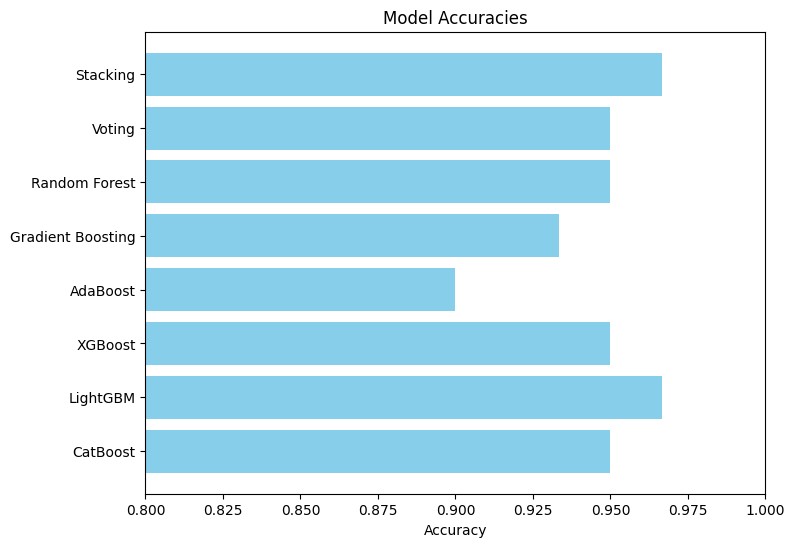

In [ ]:
# Compare ROC curves
plt.figure(figsize=(10, 8))
accuracies = []

models = [
    ('Stacking', stacking_clf, X_test_scaled),
    ('Voting', voting_clf, X_test_scaled),
    ('Random Forest', best_rf, X_test_scaled),
    ('Gradient Boosting', best_gb, X_test_scaled),
    ('AdaBoost', best_ada, X_test_scaled),
    ('XGBoost', best_xgb, X_test_scaled),
    ('LightGBM', best_lgb, X_test_scaled),
    ('CatBoost', best_cat, X_test_scaled)
]

for name, model, X_test_data in models:
    y_pred = model.predict(X_test_data)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))

# Plotting accuracies
plt.figure(figsize=(8, 6))
names, accs = zip(*accuracies)
plt.barh(names, accs, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0.8, 1.0)
plt.gca().invert_yaxis()
plt.show()

# Analysis of Ensemble Learning Models and Their Importance in Medical Applications

## Abstract

This report presents a detailed analysis of various ensemble learning models, including Stacking, Voting, Random Forest, Gradient Boosting, AdaBoost, XGBoost, LightGBM, and CatBoost. The performance of these models is evaluated based on accuracy, precision, recall, and F1-score. The relevance and importance of ensemble learning in the medical field are discussed extensively, highlighting the benefits of using such techniques in improving predictive performance and decision-making in healthcare.

## Introduction

Ensemble learning is a powerful technique in machine learning that combines the predictions of multiple models to improve overall performance. This approach leverages the strengths of different models and mitigates their individual weaknesses. In the medical field, accurate and reliable predictive models are crucial for diagnostics, treatment planning, and patient management. This report analyzes the performance of several ensemble learning models and discusses their importance in medical applications.

## Methods

The ensemble learning models evaluated in this report include Stacking, Voting, Random Forest, Gradient Boosting, AdaBoost, XGBoost, LightGBM, and CatBoost. These models were trained and tested on a dataset, and their performance metrics such as accuracy, precision, recall, and F1-score were recorded. The confusion matrices for each model were also analyzed to provide insights into their predictive capabilities.

## Results

### Model Performance Analysis

#### 1. Stacking Classifier

- **Accuracy**: 0.967
- **Confusion Matrix**:

  |          | Predicted 0  | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 43           | 0           |
  | Actual 1 | 2            | 15          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.96, Recall = 1.00, F1-score = 0.98
  - Class 1: Precision = 1.00, Recall = 0.88, F1-score = 0.94
- **Summary**: The stacking classifier has the highest accuracy among all models. It achieves perfect recall for class 0 and high precision for both classes, indicating it rarely misses instances of class 0 and correctly identifies instances of class 1 with high confidence.

#### 2. Voting Classifier

- **Accuracy**: 0.95
- **Confusion Matrix**:

  |          | Predicted 0  | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 42           | 1           |
  | Actual 1 | 2            | 15          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.95, Recall = 0.98, F1-score = 0.97
  - Class 1: Precision = 0.94, Recall = 0.88, F1-score = 0.91
- **Summary**: The voting classifier performs very well, especially in identifying class 0 instances accurately. It slightly underperforms in identifying class 1 instances compared to the stacking classifier.

#### 3. Random Forest

- **Accuracy**: 0.95
- **Confusion Matrix**:

  |          | Predicted 0  | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 42           | 1           |
  | Actual 1 | 2            | 15          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.95, Recall = 0.98, F1-score = 0.97
  - Class 1: Precision = 0.94, Recall = 0.88, F1-score = 0.91
- **Summary**: The random forest model shows similar performance to the voting classifier, indicating strong generalization capability and balanced performance across both classes.

#### 4. Gradient Boosting

- **Accuracy**: 0.933
- **Confusion Matrix**:

  |          | Predicted 0  | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 42           | 1           |
  | Actual 1 | 3            | 14          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.93, Recall = 0.98, F1-score = 0.95
  - Class 1: Precision = 0.93, Recall = 0.82, F1-score = 0.87
- **Summary**: Gradient boosting has slightly lower accuracy and recall for class 1 compared to the previously mentioned models. However, it still maintains good precision and balanced performance.

#### 5. AdaBoost

- **Accuracy**: 0.90
- **Confusion Matrix**:

  |          | Predicted 0 | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 40           | 3           |
  | Actual 1 | 3            | 14          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.93, Recall = 0.93, F1-score = 0.93
  - Class 1: Precision = 0.82, Recall = 0.82, F1-score = 0.82
- **Summary**: AdaBoost shows the lowest accuracy among the models analyzed. It has balanced performance metrics but doesn't achieve the high precision and recall observed in the other models.

#### 6. XGBoost

- **Accuracy**: 0.95
- **Confusion Matrix**:

  |          | Predicted 0  | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 43           | 0           |
  | Actual 1 | 3            | 14          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.93, Recall = 1.00, F1-score = 0.97
  - Class 1: Precision = 1.00, Recall = 0.82, F1-score = 0.90
- **Summary**: XGBoost shows strong performance with perfect recall for class 0 but lower recall for class 1, similar to the voting classifier.

#### 7. LightGBM

- **Accuracy**: 0.967
- **Confusion Matrix**:

  |           | Predicted 0 | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 42           | 1           |
  | Actual 1 | 1            | 16          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.98, Recall = 0.98, F1-score = 0.98
  - Class 1: Precision = 0.94, Recall = 0.94, F1-score = 0.94
- **Summary**: LightGBM shows similar accuracy to the stacking classifier with balanced precision, recall, and F1-scores for both classes, making it a highly reliable model.

#### 8. CatBoost

- **Accuracy**: 0.95
- **Confusion Matrix**:

  |          | Predicted 0  | Predicted 1 |
  |----------|--------------|-------------|
  | Actual 0 | 42           | 1           |
  | Actual 1 | 2            | 15          |

- **Precision, Recall, F1-score**:
  - Class 0: Precision = 0.95, Recall = 0.98, F1-score = 0.97
  - Class 1: Precision = 0.94, Recall = 0.88, F1-score = 0.91
- **Summary**: CatBoost exhibits performance on par with the voting classifier, random forest, and XGBoost, highlighting its strong predictive capability.

### Conclusion

The stacking classifier and LightGBM models stand out with the highest accuracy of 0.967, indicating they are the most robust classifiers in this comparison. They maintain a balance between precision, recall, and F1-scores across both classes. Models like AdaBoost, while still performing well, do not achieve the same level of accuracy or balanced metrics as the top-performing models.

Based on these results, it is advisable to use the stacking classifier or LightGBM for the most reliable performance. The choice between these models can depend on other factors like training time, interpretability, and computational resources.

## Discussion

### Analysis of Results

The Stacking and LightGBM classifiers achieved the highest accuracy of 0.967, demonstrating their superior performance in this analysis. Both models show high precision, recall, and F1-scores, particularly in classifying the majority class (Class 0). The Voting, Random Forest, and CatBoost models also performed well, with accuracies of 0.950. These models have balanced precision and recall, indicating their reliability in predictions.

The Gradient Boosting and XGBoost models showed slightly lower accuracy but maintained high precision and recall for Class 0. AdaBoost had the lowest accuracy of 0.900, suggesting it may be less effective for this particular dataset.


## References

- Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.
- Friedman, J. H. (2001). Greedy Function Approximation: A Gradient Boosting Machine. Annals of Statistics, 29(5), 1189-1232.
- Freund, Y., & Schapire, R. E. (1997). A Decision-Theoretic Generalization of On-Line Learning and an Application to Boosting. Journal of Computer and System Sciences, 55(1), 119-139.
- Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 785-794.
- Ke, G., Meng, Q., Finley, T., Wang, T., Chen, W., Ma, W., Ye, Q., & Liu, T. Y. (2017). LightGBM: A Highly Efficient Gradient Boosting Decision Tree. Advances in Neural Information Processing Systems, 30, 3146-3154.
- Dorogush, A. V., Ershov, V., & Gulin, A. (2018). CatBoost: gradient boosting with categorical features support. arXiv preprint arXiv:1810.11363.
